Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviewerID      4915 non-null   object
 1   asin            4915 non-null   object
 2   reviewerName    4914 non-null   object
 3   helpful         4915 non-null   object
 4   reviewText      4914 non-null   object
 5   overall         4915 non-null   int64 
 6   summary         4915 non-null   object
 7   unixReviewTime  4915 non-null   int64 
 8   reviewTime      4915 non-null   object
 9   day_diff        4915 non-null   int64 
 10  helpful_yes     4915 non-null   int64 
 11  total_vote      4915 non-null   int64 
dtypes: int64(5), object(7)
memory usage: 460.9+ KB
None
       reviewerID        asin  reviewerName helpful  \
0  A3SBTW3WS4IQSN  B007WTAJTO           NaN  [0, 0]   
1  A18K1ODH1I2MVB  B007WTAJTO          0mie  [0, 0]   
2  A2FII3I2MBMUIA  B007WTAJTO        

<ipython-input-17-3b6f3b88ca37>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, palette='coolwarm')


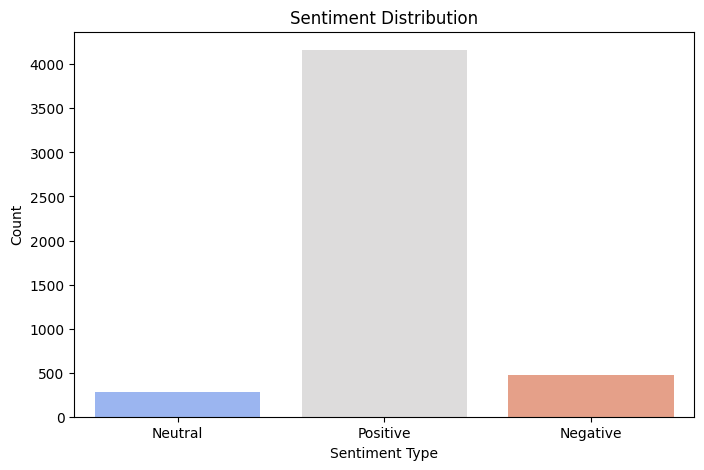

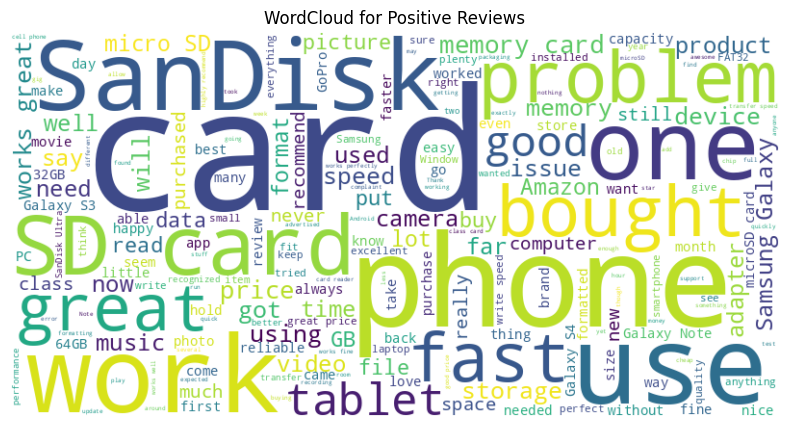

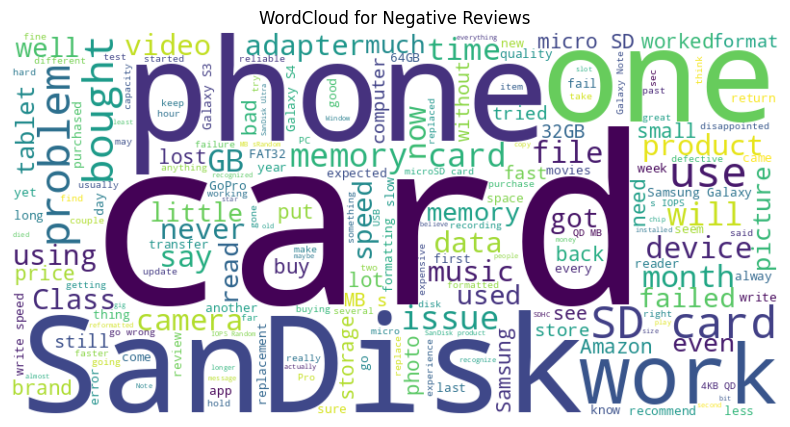

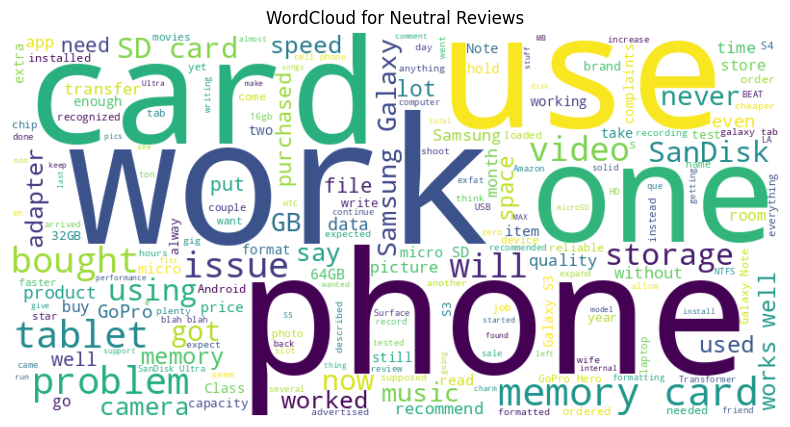

Topic 1:  card sd sandisk cards class memory speed 10 micro phone
Topic 2:  card phone format sandisk cards galaxy work just samsung 34
Topic 3:  works great card memory phone galaxy price storage fast good


<ipython-input-17-3b6f3b88ca37>:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[f"Topic {i+1}" for i in range(len(topics))], y=[sum(topic) for topic in lda.components_], palette='coolwarm')


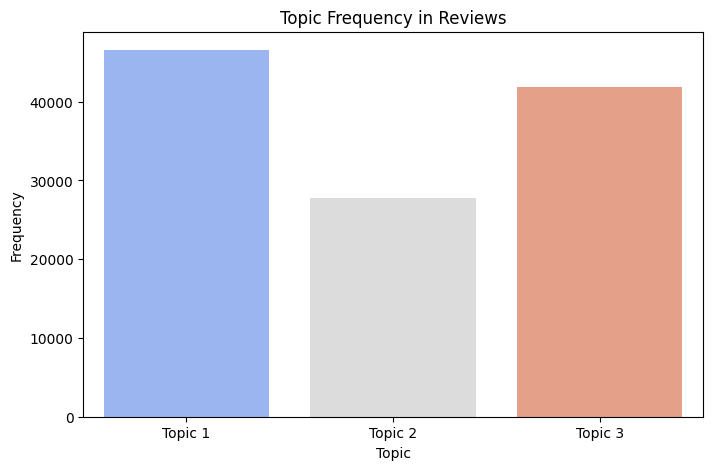

<ipython-input-17-3b6f3b88ca37>:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['overall'], y=df['review_length'], palette='coolwarm')


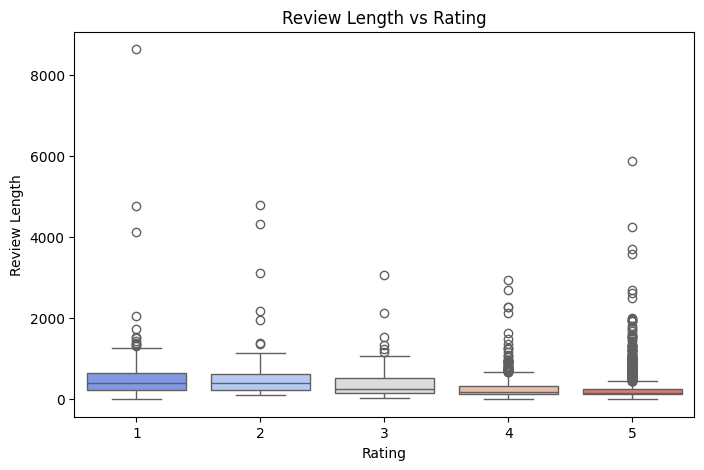

<ipython-input-17-3b6f3b88ca37>:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df['overall'], y=df['review_length'], palette='coolwarm')


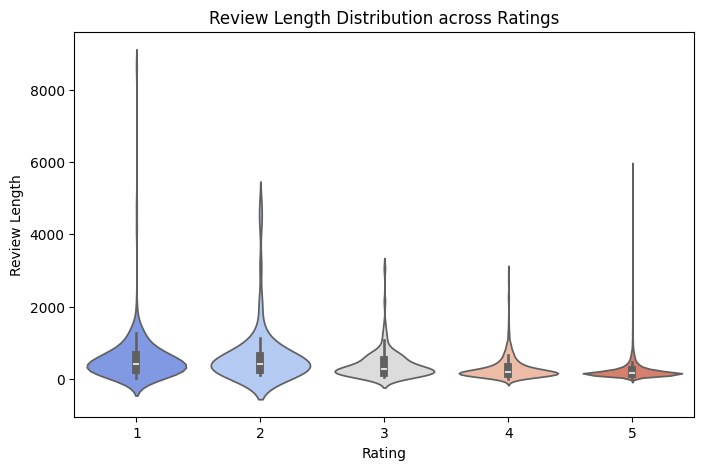

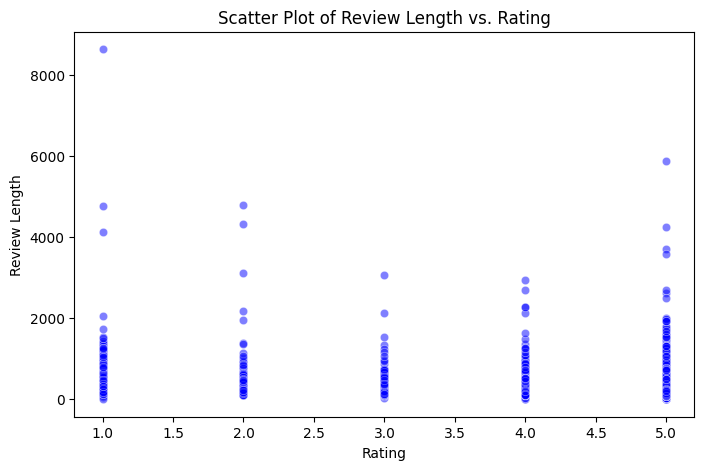

Managerial Insights: Average Review Length per Rating
   Rating  Average Review Length
0       1             558.938525
1       2             622.900000
2       3             390.098592
3       4             298.791271
4       5             233.718511


OSError: Cannot save file into a non-existent directory: '/mnt/data'

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Load dataset
df = pd.read_csv("/content/amazon_review.csv")

# Display dataset summary
print("Dataset Overview:")
print(df.info())
print(df.head())

### 1. Sentiment Analysis ###
def get_sentiment(text):
    analysis = TextBlob(str(text))
    return "Positive" if analysis.sentiment.polarity > 0 else "Negative" if analysis.sentiment.polarity < 0 else "Neutral"

df['Sentiment'] = df['reviewText'].apply(get_sentiment)  # Updated column name

# Plot sentiment distribution
plt.figure(figsize=(8,5))
sns.countplot(x='Sentiment', data=df, palette='coolwarm')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment Type")
plt.ylabel("Count")
plt.show()

# WordCloud for each sentiment
def generate_wordcloud(sentiment):
    text = " ".join(df[df['Sentiment'] == sentiment]['reviewText'].dropna())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"WordCloud for {sentiment} Reviews")
    plt.show()

generate_wordcloud("Positive")
generate_wordcloud("Negative")
generate_wordcloud("Neutral")

### 2. Topic Modeling using LDA ###
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X = vectorizer.fit_transform(df['reviewText'].dropna())  # Updated column name
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(X)

# Display topics
def display_topics(model, feature_names, num_words):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        topics.append(" ".join([feature_names[i] for i in topic.argsort()[:-num_words - 1:-1]]))
        print(f"Topic {topic_idx+1}: ", topics[-1])

    # Bar chart for topic frequency
    plt.figure(figsize=(8,5))
    sns.barplot(x=[f"Topic {i+1}" for i in range(len(topics))], y=[sum(topic) for topic in lda.components_], palette='coolwarm')
    plt.title("Topic Frequency in Reviews")
    plt.xlabel("Topic")
    plt.ylabel("Frequency")
    plt.show()

display_topics(lda, vectorizer.get_feature_names_out(), 10)

### 3. Review Length vs. Rating Analysis ###
df['review_length'] = df['reviewText'].astype(str).apply(len)  # Updated column name

# Check if 'overall' column exists, else display column names
if 'overall' not in df.columns:
    print("Column 'overall' not found! Available columns:", df.columns)
else:
    # Ensure 'overall' is numeric
    df['overall'] = pd.to_numeric(df['overall'], errors='coerce')

    # Drop NaN ratings
    df = df.dropna(subset=['overall'])

    # Convert rating to integer (if needed)
    df['overall'] = df['overall'].astype(int)

    # Plot review length vs. rating
    plt.figure(figsize=(8,5))
    sns.boxplot(x=df['overall'], y=df['review_length'], palette='coolwarm')
    plt.title("Review Length vs Rating")
    plt.xlabel("Rating")
    plt.ylabel("Review Length")
    plt.show()

    # Violin Plot for deeper insights
    plt.figure(figsize=(8,5))
    sns.violinplot(x=df['overall'], y=df['review_length'], palette='coolwarm')
    plt.title("Review Length Distribution across Ratings")
    plt.xlabel("Rating")
    plt.ylabel("Review Length")
    plt.show()

    # Scatter plot for review length vs. rating
    plt.figure(figsize=(8,5))
    sns.scatterplot(x=df['overall'], y=df['review_length'], alpha=0.5, color='blue')
    plt.title("Scatter Plot of Review Length vs. Rating")
    plt.xlabel("Rating")
    plt.ylabel("Review Length")
    plt.show()

    # Managerial insights summary
    insights = df.groupby('overall')['review_length'].mean().reset_index()
    insights.columns = ['Rating', 'Average Review Length']
    print("Managerial Insights: Average Review Length per Rating")
    print(insights)

    # Save insights to CSV for further decision-making
    insights_path = "/mnt/data/review_length_vs_rating_insights.csv"
    insights.to_csv(insights_path, index=False)
    print(f"Insights saved at {insights_path}")